In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas
import plotly.express as px
from windrose import WindroseAxes

/var/folders/6f/q6rj66q95cj2gdjclzvg_66m0000gp/T/ipykernel_99788/3879994007.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas


In [2]:
site_list = ['Albemarle', 'Boulmer', 'Charterhall', 'Gogarbank', 'Leuchars', 'Redesdale']

# 'Penmanshiel'

df_P_2016 = pandas.read_excel(f'./datasets/Penmanshiel.xlsx' , sheet_name=0)
df_P_2017 = pandas.read_excel(f'./datasets/Penmanshiel.xlsx' , sheet_name=1)




In [3]:

# Charterhall has 2013-2022

df_C_0= pandas.read_excel(f'./datasets/{site_list[2]}.xlsx' , sheet_name=0)
df_C_1= pandas.read_excel(f'./datasets/{site_list[2]}.xlsx' , sheet_name=1)
df_C_2= pandas.read_excel(f'./datasets/{site_list[2]}.xlsx' , sheet_name=2)
df_C_3 = pandas.read_excel(f'./datasets/{site_list[2]}.xlsx' , sheet_name=3)
df_C_4 = pandas.read_excel(f'./datasets/{site_list[2]}.xlsx' , sheet_name=4)
df_C_5 = pandas.read_excel(f'./datasets/{site_list[2]}.xlsx' , sheet_name=5)
df_C_6 = pandas.read_excel(f'./datasets/{site_list[2]}.xlsx' , sheet_name=6)
df_C_7 = pandas.read_excel(f'./datasets/{site_list[2]}.xlsx' , sheet_name=7)
df_C_8 = pandas.read_excel(f'./datasets/{site_list[2]}.xlsx' , sheet_name=8)
df_C_9 = pandas.read_excel(f'./datasets/{site_list[2]}.xlsx' , sheet_name=9)


In [4]:
list_df = [df_C_0, df_C_1, df_C_2, df_C_3, df_C_4, df_C_5, df_C_6, df_C_7, df_C_8, df_C_9]

for i in range(len(list_df)):
    list_df[i].columns = ['datetime', 'mean_wind_dir', 'mean_speed_knots'] # for standardisation 
    list_df[i] = list_df[i][:-1] # removes 'end data' row
    #list_df[i]["mean_speed_ms"] = (list_df[i]['mean_speed_knots'] * (1 / 1.94384)) does not work
    


means_list = []

for df in list_df:
    means_list.append(df['mean_speed_knots'].mean())
    df = df.dropna()

mean_all_years = (sum(means_list)) / (len(means_list))

mean_all_years = mean_all_years * (1 / 1.94384)  # converting from knots to m/s

mean_all_years

4.475626228704344

In [5]:
# regression line between P and C is y = 1.11x + 2.70

m = 1.11
c = 2.70

P_mean = ((mean_all_years) * m ) + c

P_mean # predicted mean for Penmanshiel

7.667945113861822

In [6]:
df_P_2017.columns = ['datetime', 'mean_speed_ms', 'speed_std', 'mean_wind_dir']


In [7]:
# getting the rayleigh graph 

df_P_2017['mean_speed_ms_rounded'] = df_P_2017['mean_speed_ms'].round()

df_P_2017_vcounts = df_P_2017['mean_speed_ms_rounded'].value_counts().reset_index(drop = False)

totalcounts = df_P_2017_vcounts['count'].sum()
totalcounts

df_P_2017_vcounts['rel_freq'] = df_P_2017_vcounts['count'] / totalcounts

df_P_2017_vcounts['rel_freq_hours'] = df_P_2017_vcounts['rel_freq'] * 8760

df_P_2017_vcounts = df_P_2017_vcounts.sort_values(by = "mean_speed_ms_rounded", ascending=True)
df_P_2017_vcounts = df_P_2017_vcounts.reset_index(drop = True)


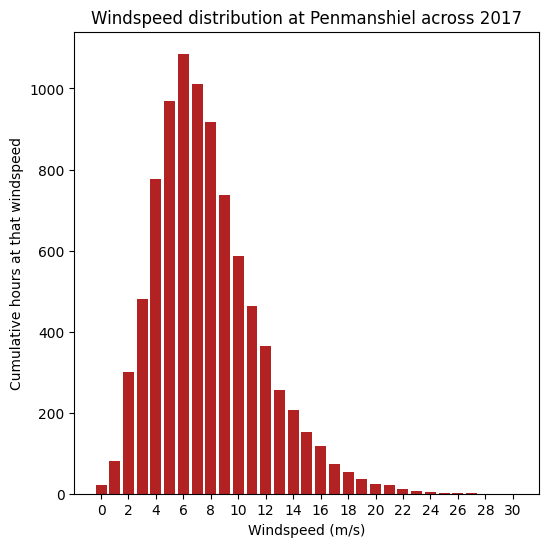

In [8]:
fig, ax = plt.subplots(figsize = (6, 6))

x = df_P_2017_vcounts["mean_speed_ms_rounded"]
y = df_P_2017_vcounts['rel_freq_hours']

plt.xticks(np.arange(0, len(x), 2))
plt.title("Windspeed distribution at Penmanshiel across 2017")
plt.xlabel("Windspeed (m/s)")
plt.ylabel("Cumulative hours at that windspeed")

fig = plt.bar(x, y, color = 'firebrick')

plt.savefig("windspeed_distribution_penmanshiel_2017.png")



In [9]:
U = np.arange(0, df_P_2017['mean_speed_ms'].max(), 1)

In [10]:
mean_2017 = df_P_2017['mean_speed_ms'].mean()
mean_2017

7.735113373800476

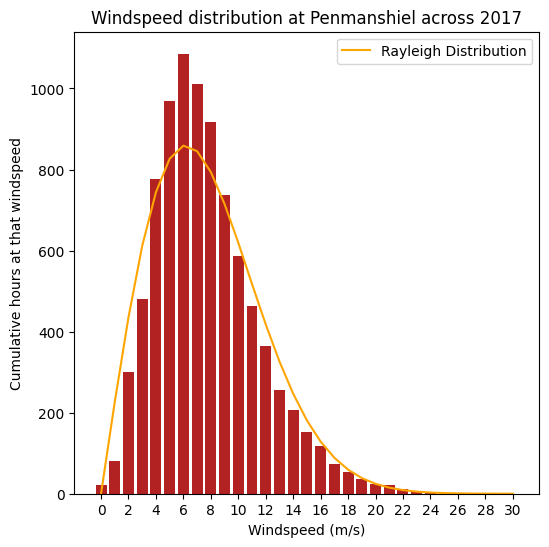

In [11]:
U = np.arange(0, df_P_2017['mean_speed_ms'].max(), 1)
mean_2017 = df_P_2017['mean_speed_ms'].mean()

k = 2
c = 1.13 * mean_2017

df_P_2017_vcounts["R"] = ((k/c) * ((U / c)**(k-1)) * np.exp(-(U/c)**k)) * 8760


#df_P_2017_vcounts["R"] = (k/c) * ((df_P_2017['mean_speed_ms'] / c)**(k-1)) * np.exp(-(df_P_2017['mean_speed_ms']/c)**k)

x = np.arange(0, len(df_P_2017_vcounts))

fig, ax = plt.subplots(figsize = (6, 6))

x = df_P_2017_vcounts["mean_speed_ms_rounded"]
y = df_P_2017_vcounts['rel_freq_hours']


ax.bar(x, y, color = 'firebrick')

# cannot plot both of these simoultaneously 

ax.plot(x, df_P_2017_vcounts["R"], label = 'Rayleigh Distribution', c = 'orange')
plt.legend()
ax.set_xticks(np.arange(0, len(x), 2))
ax.set_title("Windspeed distribution at Penmanshiel across 2017")
ax.set_xlabel("Windspeed (m/s)")
ax.set_ylabel("Cumulative hours at that windspeed")

plt.savefig("windspeed_distribution_penmanshiel_2017_withR.png")




In [15]:
list_df = [df_C_0, df_C_1, df_C_2, df_C_3, df_C_4, df_C_5, df_C_6, df_C_7, df_C_8, df_C_9]

mean_list_C = []

for df in list_df:
    mean_list_C.append((df['mean_speed_knots'].mean()) * (1 / 1.94384))


P90_df = pandas.DataFrame(data = mean_list_C, columns=['mean_C'])
P90_df = P90_df.sort_values(by = 'mean_C').reset_index(drop = True)


P90_df

,mean_C
0,4.049837
1,4.276077
2,4.296456
3,4.360416
4,4.415110
5,4.470792
6,4.547516
7,4.692202
8,4.719176
9,4.928679


In [17]:
# regression line between P and C is y = 1.11x + 2.70

m = 1.11
c = 2.70

P90_df['mean_P'] = (P90_df['mean_C'] * m ) + c

P90_df


,mean_C,mean_P
0,4.049837,7.195319
1,4.276077,7.446446
2,4.296456,7.469066
3,4.360416,7.540062
4,4.415110,7.600772
5,4.470792,7.662579
6,4.547516,7.747743
7,4.692202,7.908344
8,4.719176,7.938286
9,4.928679,8.170834


In [18]:
P90_df['rank'] = P90_df['mean_P'].rank(ascending=False)

totalyears = len(P90_df)

P90_df['exc_prob'] = P90_df['rank'] / (totalyears+1)

P90_df

,mean_C,mean_P,rank,exc_prob
0,4.049837,7.195319,10.0,0.909091
1,4.276077,7.446446,9.0,0.818182
2,4.296456,7.469066,8.0,0.727273
3,4.360416,7.540062,7.0,0.636364
4,4.415110,7.600772,6.0,0.545455
5,4.470792,7.662579,5.0,0.454545
6,4.547516,7.747743,4.0,0.363636
7,4.692202,7.908344,3.0,0.272727
8,4.719176,7.938286,2.0,0.181818
9,4.928679,8.170834,1.0,0.090909


Text(0, 0.5, 'Exceedance Probability')

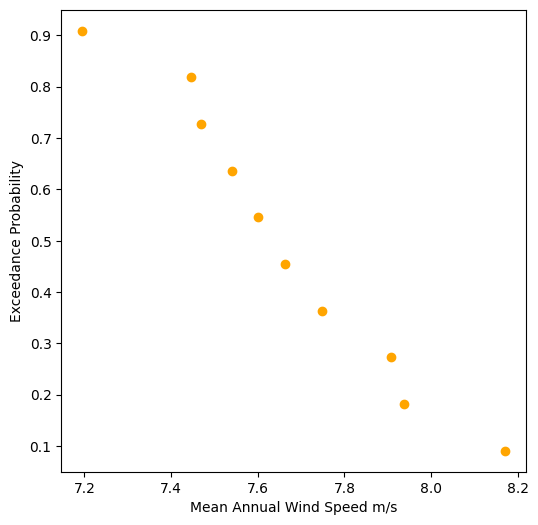

In [26]:
fig, ax = plt.subplots(figsize = (6, 6))

x = P90_df['mean_P']
y = P90_df['exc_prob']

ax.scatter(x, y, color = 'orange')
ax.set_xlabel("Mean Annual Wind Speed m/s")
ax.set_ylabel("Exceedance Probability")

In [27]:
number_years = len(P90_df)
mean_p90_df = P90_df['mean_P'].mean()
sd_p90_df = P90_df['mean_P'].std()

# p90 as a number of std = 1.282

p90_std_num = 1.282

P90_windspeed = mean_p90_df - (p90_std_num * sd_p90_df)

P90_windspeed

7.304579598715103

In [34]:
# if we assume that the variation in wind speeds from one year to another is normally distributed, then we can fit a normal curve

from scipy.stats import norm

windspeeds = np.arange((P90_windspeed-1), P90_df['mean_P'].max(), 0.15)

windspeeds_df = pandas.DataFrame(data = windspeeds, columns = ['windspeeds'])

windspeeds_df['num_std_from_mean'] = (windspeeds_df['windspeeds'] - mean_p90_df) / sd_p90_df

windspeeds_df['percentile']  = norm.cdf(windspeeds_df['num_std_from_mean'])

windspeeds_df['Exceedance'] = 1 - windspeeds_df['percentile']

windspeeds_df



,windspeeds,num_std_from_mean,percentile,Exceedance
0,6.30458,-4.810128,7.541689e-07,0.999999
1,6.45458,-4.280909,9.306586e-06,0.999991
2,6.60458,-3.751690,8.782346e-05,0.999912
3,6.75458,-3.222470,6.354516e-04,0.999365
4,6.90458,-2.693251,3.537947e-03,0.996462
5,7.05458,-2.164032,1.523095e-02,0.984769
6,7.20458,-1.634813,5.104415e-02,0.948956
7,7.35458,-1.105594,1.344512e-01,0.865549
8,7.50458,-0.576374,2.821811e-01,0.717819
9,7.65458,-0.047155,4.811947e-01,0.518805
